In [1]:
'''
About dataset:
- There are 25 videos.
- Comprised of PESU Academy videos of Cloud Computing course, all following the same slide structure.
- Videos range from 7 mins to 34 mins in duration, with around 75% of videos having duration less than 22.5 mins.
- There are 562 question-answer details.
- Deviation from actual start-time of answers when start of the video is taken as the predicted start-time:
    - Average of 502s or 46% of video, 
    - Average of 357s or 35.4% of video, ignoring 20% of outliers
'''
''''''

''

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dset = pd.read_csv('cc-dset-questions-v1.csv')
dsetDetails = pd.read_csv('cc-dset-vid-details.csv')

In [4]:
#Video-Count #Duration Details
print('No. of videos: ', len(dsetDetails))
print('Duration Details (in Min):')
print(dsetDetails['Duration'].map(lambda x: x/60).describe())


No. of videos:  25
Duration Details (in Min):
count    25.000000
mean     17.908000
std       6.400865
min       7.450000
25%      13.350000
50%      17.316667
75%      22.233333
max      34.033333
Name: Duration, dtype: float64


Questions-dataset details

In [5]:
dset.head()

,Video_ID,Question,Start_timestamp
0,101,What is authentication?,28
1,101,What is Keystone?,54
2,101,What is a project in Keystone?,80
3,101,What is the fundamental purpose of the keystone?,92
4,101,What does assigning role to a user or user gro...,113


In [6]:
print('No. of questions: ', len(dset))

No. of questions:  562


In [7]:
def showAvgPlots(arr, ylabel='Duration', xlabel='Answers in %'):
    arr.sort()
    plots = [0]
    for i in range(1, 101):
        x = int((i*len(arr))/100)
        avg = sum(arr[:x])/x
        plots.append(avg)
    print('Mean: ', round(plots[-1], 2))
    plt.plot(plots)
    plt.xticks(list(range(0,101, 10)))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()
    plt.show()

Mean:  46.04


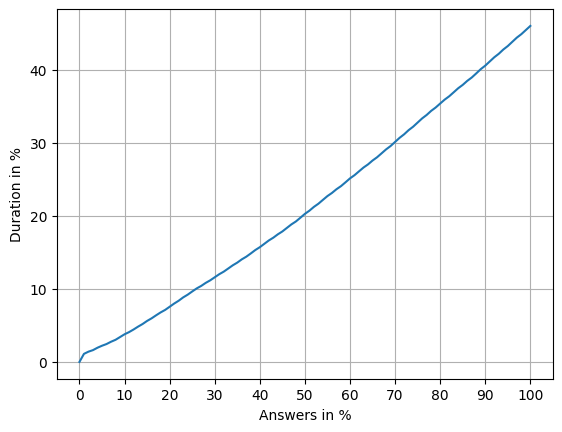

Mean:  502.0


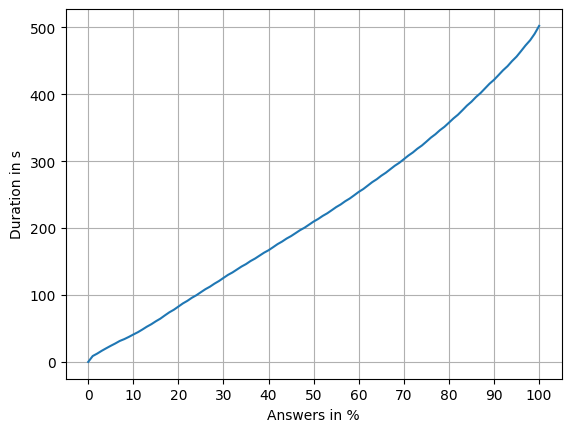

In [8]:
temp = dset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

errs = list((temp['Start_timestamp']*100)/temp['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(temp['Start_timestamp'])
showAvgPlots(errs, ylabel='Duration in s')

In [9]:
#Shows average deviation of actual start point of answers from choosen start point in both seconds and percentage.
#Average deviation vs Best X% answers ie ignoring (100-X)% as outliers